In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls

drive  sahrs_on_the_field.jpg  sample_data


In [4]:
import cv2
import time
import math
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

WIND_X = 800
WIND_Y = 500

canvas = cv2.imread("sahrs_on_the_field.jpg")
print("Высота:"+str(canvas.shape[0]))
print("Ширина:" + str(canvas.shape[1]))
print("Количество каналов:" + str(canvas.shape[2]))


Высота:1280
Ширина:720
Количество каналов:3


In [5]:
print(canvas.shape, type(canvas[0,0,0]))

(1280, 720, 3) <class 'numpy.uint8'>


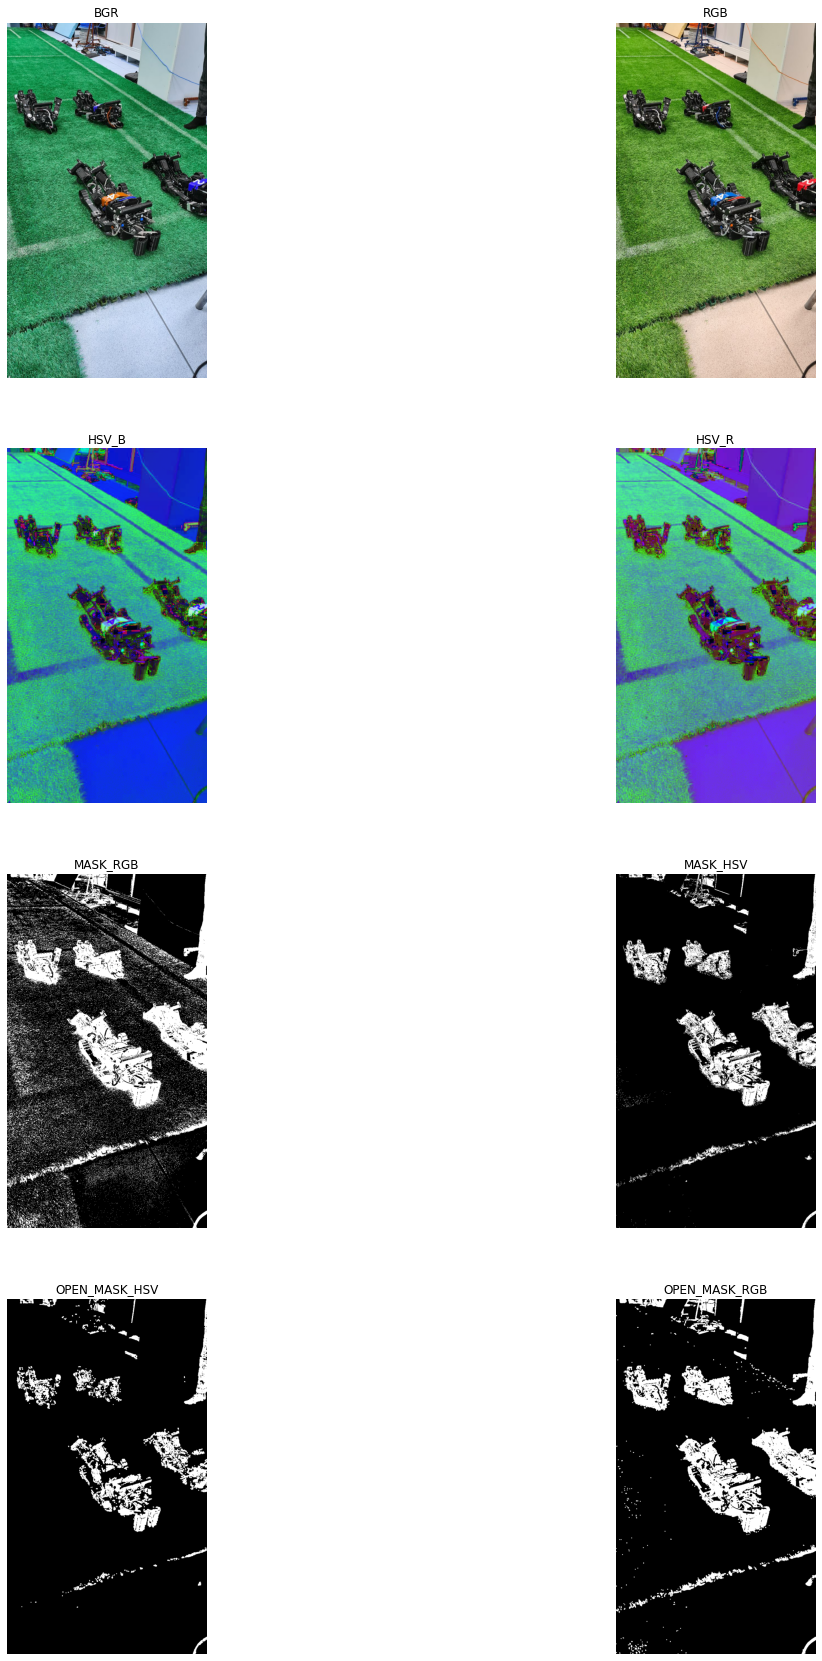

In [6]:
# Представление входных данных в других форматах
img_hsv_B = cv2.cvtColor(canvas,cv2.COLOR_BGR2HSV)
img_hsv_R = cv2.cvtColor(canvas,cv2.COLOR_RGB2HSV)
im_rgb = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)

# Маскирование
mask = cv2.inRange(im_rgb, (45,99,9),(255,224,214))
mask_HSV = cv2.inRange(img_hsv_B, (0,0,0),(255,157,92))

# Морфологические операции

kernel = np.ones((3,3),np.uint8) # Ядро обработки маски
opening_HSV = cv2.morphologyEx(mask_HSV, cv2.MORPH_OPEN,kernel)
opening_RGB = cv2.morphologyEx(255-mask, cv2.MORPH_OPEN,kernel)
plt.figure(figsize=(20, 30))

plt.subplot(421)
plt.imshow(canvas)
plt.axis('off')
plt.title('BGR')

plt.subplot(422)
plt.imshow(im_rgb)
plt.axis('off')
plt.title('RGB')

plt.subplot(423)
plt.imshow(img_hsv_B)
plt.axis('off')
plt.title('HSV_B')

plt.subplot(424)
plt.imshow(img_hsv_R)
plt.axis('off')
plt.title('HSV_R')

plt.subplot(425)
plt.imshow(255-mask,cmap='gray')
plt.axis('off')
plt.title('MASK_RGB')

plt.subplot(426)
plt.imshow(mask_HSV,cmap='gray')
plt.axis('off')
plt.title('MASK_HSV')

plt.subplot(427)
plt.imshow(opening_HSV,cmap='gray')
plt.axis('off')
plt.title('OPEN_MASK_HSV')

plt.subplot(428)
plt.imshow(opening_RGB,cmap='gray')
plt.axis('off')
plt.title('OPEN_MASK_RGB')

plt.show()

In [ ]:
import cv2
import time
import math
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
 
def f(rl, gl, bl, rh, gh, bh):
    
    mask = cv2.inRange(im_rgb, (rl, gl, bl),(rh, gh, bh))

    plt.figure (figsize=(8, 10))
    plt.imshow (mask,cmap='gray')
    plt.show ()
    plt.pause (0.05)
    plt.clf ()
 
interactive_plot = interactive(f, rl = (0, 255, 1), gl = (0, 255, 1), bl = (0, 255, 1),
                               rh = (0, 255, 1), gh = (0, 255, 1), bh = (0, 255, 1))
 
output = interactive_plot.children[-1]
output.layout.height = str (WIND_Y) + 'px'
output.layout.width = str (WIND_X) + 'px'
interactive_plot

interactive(children=(IntSlider(value=127, description='rl', max=255), IntSlider(value=127, description='gl', …